In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
df = pd.read_csv("data/bank/bank.csv", sep=";")

In [99]:
var_mapping = {"yes": 1, "no": 0}
df.replace(var_mapping, inplace=True)

In [11]:
from patsy.contrasts import Treatment

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [70]:
jobs_levels = list(df["job"].unique())
print jobs_levels
joblevel_encoding = Treatment(reference=0).code_without_intercept(jobs_levels)

['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']


In [30]:
#married_mapping = {"single": 0, "married": 1}
#df.replace(married_mapping, inplace=True)

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,0,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [32]:
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [35]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [85]:
education_map = {"primary": 6, "secondary": 12, "tertiary":16, "unknown":0}

In [38]:
df_unknown = df.loc[df["education"] == "unknown"]

In [41]:
df_unknown["job"].value_counts()

blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
unknown          127
retired          119
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

In [42]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,0,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,1,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,0,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,1,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,0,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


In [45]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [46]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [47]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [50]:
df["previous"].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1173b40d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118d72090>]], dtype=object)

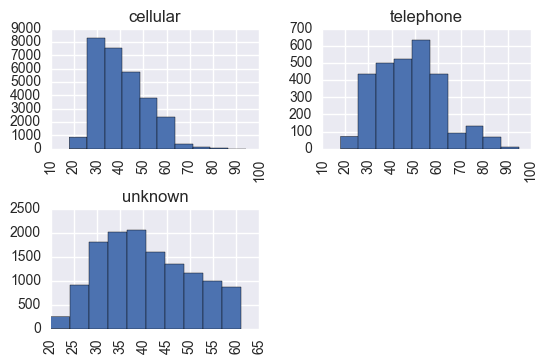

In [51]:
df.hist(column="age", by="contact")

In [55]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [58]:
df_success = df.loc[df["y"] == 1]

In [59]:
df_success.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0
mean,41.670070,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354,1.0
std,13.497781,0.098676,3501.104777,0.481714,0.288361,8.501875,392.525262,1.921826,118.822266,2.553272,0.0
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,8.000000,1.000000,-1.000000,0.000000,1.0
25%,31.000000,0.000000,210.000000,0.000000,0.000000,8.000000,244.000000,1.000000,-1.000000,0.000000,1.0
50%,38.000000,0.000000,733.000000,0.000000,0.000000,15.000000,426.000000,2.000000,-1.000000,0.000000,1.0
75%,50.000000,0.000000,2159.000000,1.000000,0.000000,22.000000,725.000000,3.000000,98.000000,1.000000,1.0
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,32.000000,854.000000,58.000000,1.0


In [61]:
df_success["poutcome"].value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [62]:
df_failure = df.loc[df["y"] == 0]

In [63]:
df_failure["poutcome"].value_counts()

unknown    33573
failure     4283
other       1533
success      533
Name: poutcome, dtype: int64

In [65]:
success_counts = df_success["poutcome"].value_counts()
failure_counts = df_failure["poutcome"].value_counts()

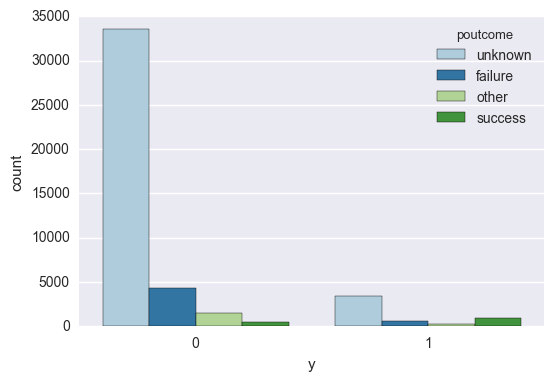

In [139]:
sns.countplot(x="y", hue="poutcome", data=df, palette="Paired")

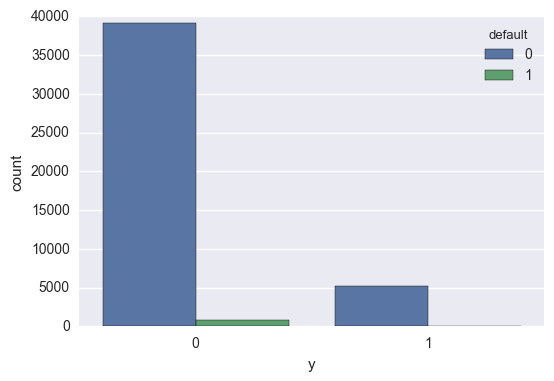

In [67]:
sns.countplot(x="y", hue="default", data=df)

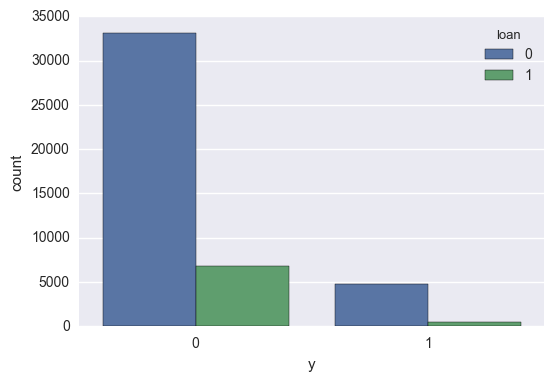

In [68]:
sns.countplot(x="y", hue="loan", data=df)

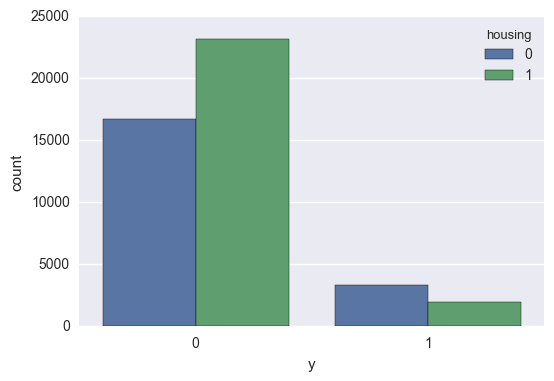

In [69]:
sns.countplot(x="y", hue="housing", data=df)

In [103]:
jobs = pd.get_dummies(df["job"])

In [104]:
df1 = pd.concat([df, jobs], axis=1)

In [105]:
df1.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,management,married,2,0,2143,1,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,technician,single,1,0,29,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,entrepreneur,married,1,0,2,1,1,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,unknown,single,0,0,1,0,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
df["unknown_education"] = df["education"].map(lambda x:  1 if x == "unknown" else 0)

In [101]:
df["education"].replace(education_map, inplace=True)

In [102]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,unknown_education
0,58,management,married,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,technician,single,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,entrepreneur,married,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1
4,33,unknown,single,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1


In [106]:
df1 = pd.concat([df, jobs], axis=1)

In [107]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,management,married,2,0,2143,1,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,technician,single,1,0,29,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,entrepreneur,married,1,0,2,1,1,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,unknown,single,0,0,1,0,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [111]:
contact_type = pd.get_dummies(df["contact"])

In [112]:
contact_type.head()

,cellular,telephone,unknown
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [130]:
df2 = pd.concat([df1, contact_type.iloc[:, 1:]], axis=1)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,58,management,married,2,0,2143,1,0,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,technician,single,1,0,29,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,married,1,0,2,1,1,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,unknown,single,0,0,1,0,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [136]:
categorical_columns = ["job", "marital", "contact", "month", "poutcome"]

In [138]:
def add_dummy(df, column_name):
    categorical_data = pd.get_dummies(df[column_name])
    df = df.concat([df, categorical_data], axis=1)
    df.drop(column_name)

In [ ]:
for col in categorical_columns:
    